# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/craig/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


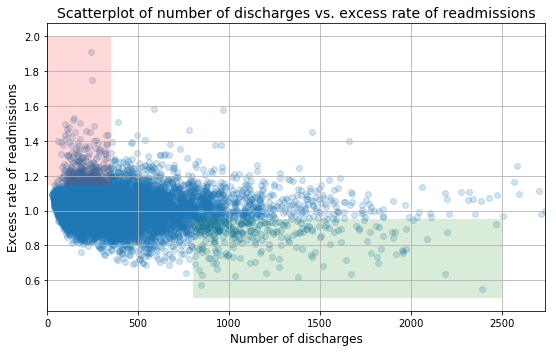

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

</div>
****

# Do you agree with the above analysis and recommendations? <br>

I'll come back to this at the end.  It's hard to make any great recommendations with just a data visualization.

# Exploritory analyses


In [6]:
df = clean_hospital_read_df

In [7]:
# Obtain value counts for missing 
df['Excess Readmission Ratio'].isnull().value_counts()

False    11497
True        81
Name: Excess Readmission Ratio, dtype: int64

In [8]:
# Drop out the cases where we don't have a readmissions ratio
clean = df[df['Excess Readmission Ratio'].notnull()]

In [9]:
# Let just get a numerical idea of the number of discharges
clean['Number of Discharges'].describe()

count    11497.000000
mean       365.466209
std        308.754590
min         25.000000
25%        160.000000
50%        282.000000
75%        474.000000
max       6793.000000
Name: Number of Discharges, dtype: float64

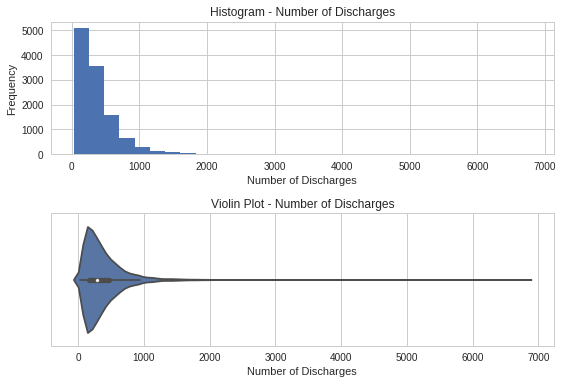

In [69]:
import seaborn as sns
# Let's look at some datat visualizations of the number of discharges 
plt.subplot(211)
clean['Number of Discharges'].plot(kind='hist', bins=30)
plt.xlabel("Number of Discharges")
plt.title("Histogram - Number of Discharges")

plt.subplot(212)
sns.set_style("whitegrid")
ax = sns.violinplot(x=clean['Number of Discharges'])
plt.title("Violin Plot - Number of Discharges")
plt.tight_layout()

In [26]:
# What percent of hospitals discharge above 1000? 
(clean['Number of Discharges'] > 1000).sum() / len(clean['Number of Discharges']) *100

4.0271375141341226

In [70]:
# What percent of hospitals discharge <= 100? 
(clean['Number of Discharges'] <= 100).sum() / len(clean['Number of Discharges']) *100

10.637557623727929

In [55]:
# OK let's look at the correlation between discharges and readmissions 
from scipy import stats
stats.pearsonr(clean['Number of Discharges'], clean['Excess Readmission Ratio'])

(-0.097397943510793533, 1.222547377680967e-25)

There is a statistically significance with a small negative correlation. 

In [71]:
# Let's subset the dataset 
large = clean[clean['Number of Discharges'] >= 1000]
small = clean[clean['Number of Discharges'] <= 100]

In [72]:
# Print let's look at the mean readmission rates
print("Large Hospital Mean:{0:.2f}; Small Hospital Mean:{1:.2f}".format(large['Excess Readmission Ratio'].mean(), 
small['Excess Readmission Ratio'].mean()))

Large Hospital Mean:0.98; Small Hospital Mean:1.02


In [74]:
# Is there a mean difference to the proportions 
results = stats.ttest_ind(large['Excess Readmission Ratio'], small['Excess Readmission Ratio'])

In [75]:
print("t-test: {0:.2f}; p-value: {1:.2f}".format(results.statistic, results.pvalue))

t-test: -10.03; p-value: 0.00


It looks like there is a statistically significant difference between large and smaller hospitals but the difference (effect size) is small (r = -.09) in size.  

In [76]:
# Let's look at the projections for those above and below 100.  How accurate are they?

In [77]:
print("Correlation between predicted and expected readmissions")
print("Small Hospitals r = {0:.2f}; Large Hospitals r = {1:.2f}".format(stats.pearsonr(small['Predicted Readmission Rate'], small['Expected Readmission Rate'])[0],
                                                                       stats.pearsonr(large['Predicted Readmission Rate'], large['Expected Readmission Rate'])[0]
                                                                       ))

Correlation between predicted and expected readmissions
Small Hospitals r = 0.94; Large Hospitals r = 0.98


In [78]:
print("Correlation between predicted readmission and number of discharges")
print("Small Hospitals r = {0:.2f}; Large Hospitals r = {1:.2f}".format(stats.pearsonr(small['Predicted Readmission Rate'], small['Number of Discharges'])[0],
                                                                       stats.pearsonr(large['Predicted Readmission Rate'], large['Number of Discharges'])[0]
                                                                       ))

Correlation between predicted readmission and number of discharges
Small Hospitals r = -0.30; Large Hospitals r = -0.15


In [82]:
# Plot 

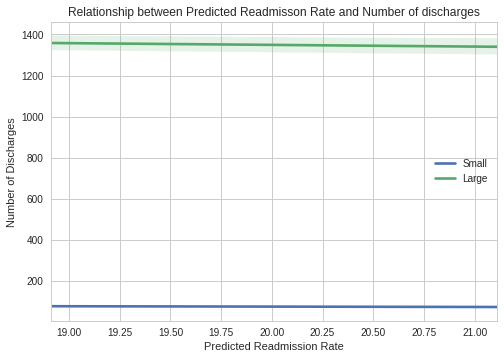

In [91]:
sns.regplot(small['Predicted Readmission Rate'], small['Number of Discharges'], scatter = False, label = 'Small')
sns.regplot(large['Predicted Readmission Rate'], large['Number of Discharges'], scatter = False, label = 'Large')
plt.legend(loc = 'center right')
plt.title("Relationship between Predicted Readmisson Rate and Number of discharges")

My experience is that data can be analyzed and interpreted in different ways.  I think numerically the explanation that is provided isn't inaccurate.  The differences they outline do exist.  However, I would intepret it and analyze it differently.  My analyses show that the differences between the two hospitals are small (r = -.09).  Diving into the data a little more what I see is there is a diffence in the accuracy of the predicted and number of discharges.  That difference is larger for those in the small hosptials than those in the large hospitals.  Because that number isn't as accurate for the small hosptials there is more wiggle room and probably ends up being seen in the slight excess in readmissions.  I think the extrapolation to upgrading equipment and what not is probably a little bit of a stretch from this data given the small overall difference (~2% overage).  My suggestion would be to tighten up the predicted levels so they are roughly equal to that of the large hospitals and then reanalyze the readmissions.  If the differences still exist then it might be worth making the recommendation.  I think the last thing we have to keep in mind is that small differences can still have a meaningful impact.  Although the correlation is small that number may have practical siginficance depending on the field of interest.  That 2% readmission rate may be meaningful in the medial field, I'm not sure.  Finally, I think one of the better ways to see the "difference" here is to look at the actual ploted lines.  It's "hard" to read but it's hard because the difference here is minimal between the groups.  As such I think it's still an accuate way to display the data of small differences between the groups.  